# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

### Sumber Dataset : [Beverage Sales](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)  
Dataset ini berisi informasi penjualan dalam industri minuman, memiliki 8.999.910 baris dan 11 kolom. Dataset ini tidak memiliki label atau kelas, mengandung data kategorikal dan numerikal.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [160]:
df = pd.read_csv('beverage_sales.csv')

# Ambil 100.000 baris secara acak, karena dataset terlalu besar
sample_size = 100000
df = df.sample(n=sample_size, random_state=42)

df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


In [161]:
# Menghapus fitur yang tidak diperlukan (Order_ID, Customer_ID, Order_Date)
df.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date'], inplace=True)
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
4990465,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen
5995542,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen
1044351,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen
1802181,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg
6900691,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [162]:
print("Jumlah baris dan kolom:", df.shape)
print(df.info())

Jumlah baris dan kolom: (100000, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4990465 to 1950082
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Customer_Type  100000 non-null  object 
 1   Product        100000 non-null  object 
 2   Category       100000 non-null  object 
 3   Unit_Price     100000 non-null  float64
 4   Quantity       100000 non-null  int64  
 5   Discount       100000 non-null  float64
 6   Total_Price    100000 non-null  float64
 7   Region         100000 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB
None


In [163]:
# Cek missing value
df.isnull().sum()

,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [164]:
# Cek statistik deskriptif
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.865283,23.108880,0.029747,132.272376
std,14.800602,26.874866,0.044783,514.937111
min,0.320000,1.000000,0.000000,0.310000
25%,1.050000,6.000000,0.000000,8.400000
50%,1.750000,11.000000,0.000000,21.110000
75%,3.210000,30.000000,0.050000,69.990000
max,147.230000,100.000000,0.150000,13637.250000


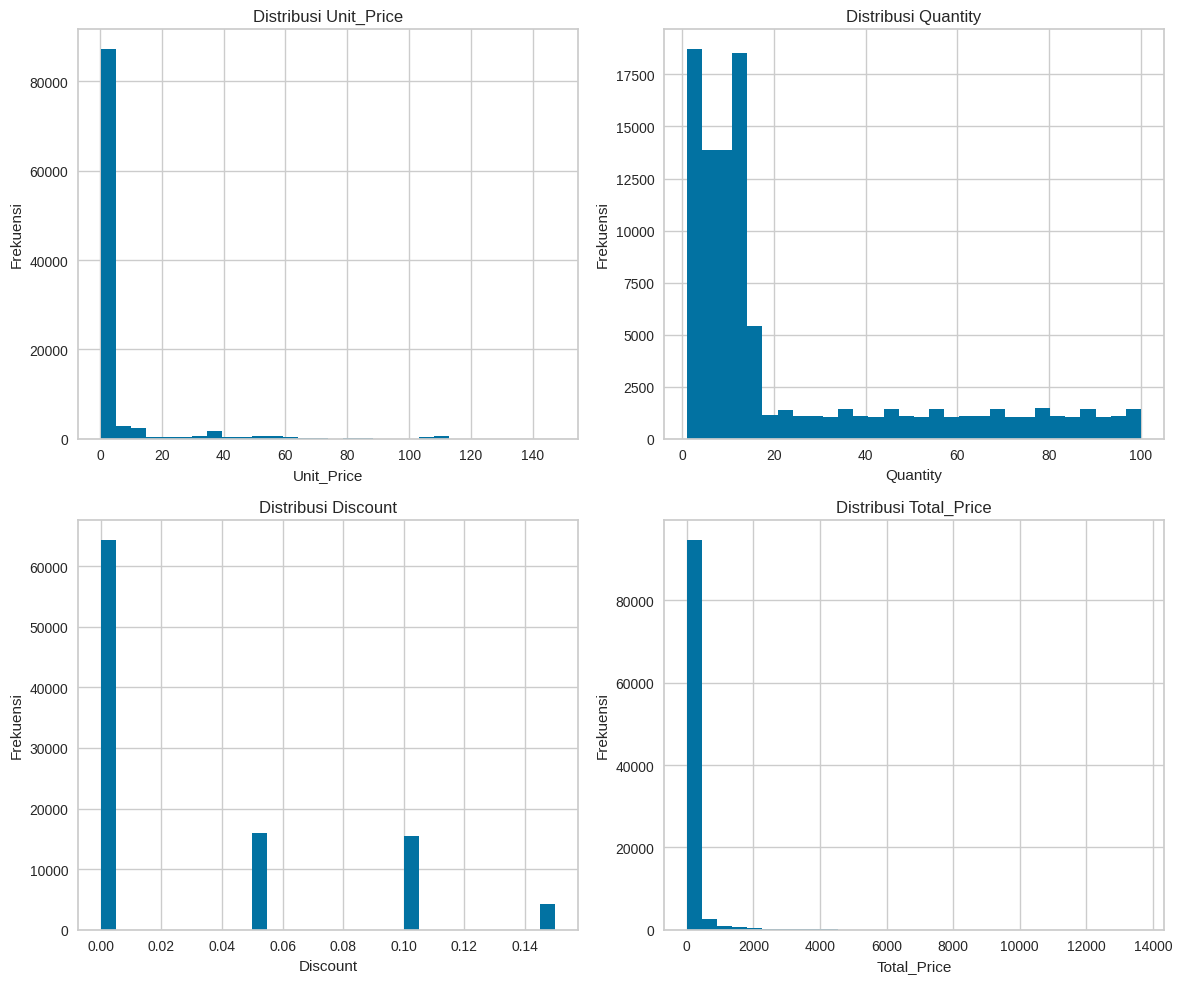

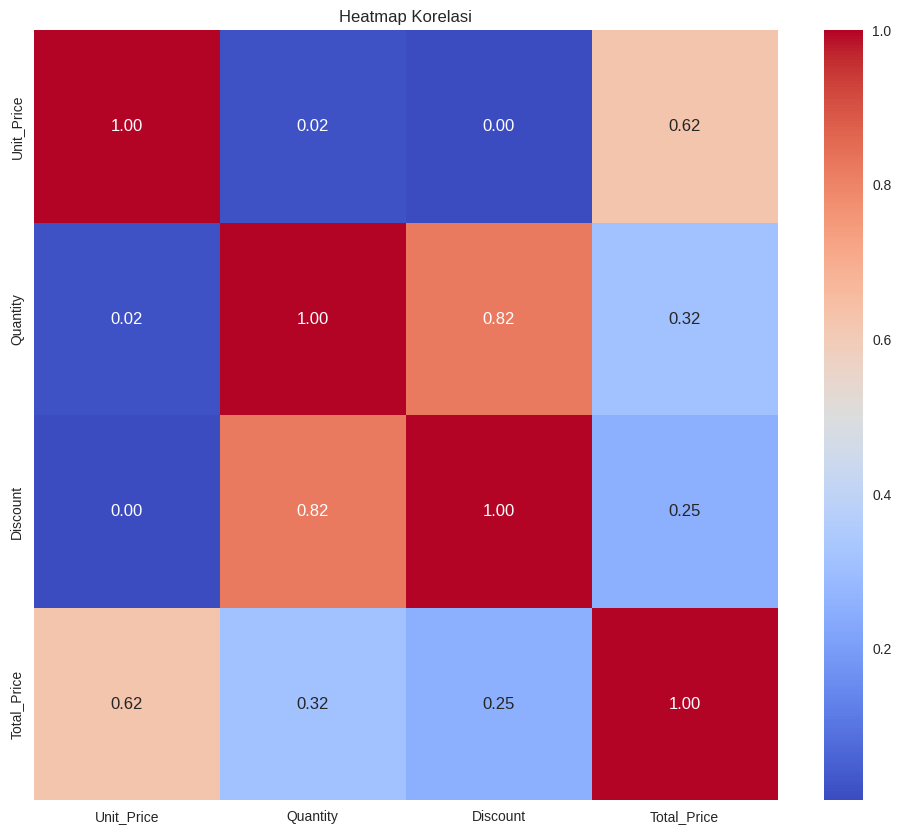

In [165]:
# Analisis Distribusi Variabel Numerik
numerical_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop untuk menampilkan histogram pada setiap subplot
for i, column in enumerate(numerical_cols[:4]):
    df[column].hist(bins=30, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Visualisasi Korelasi Antar Variabel
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

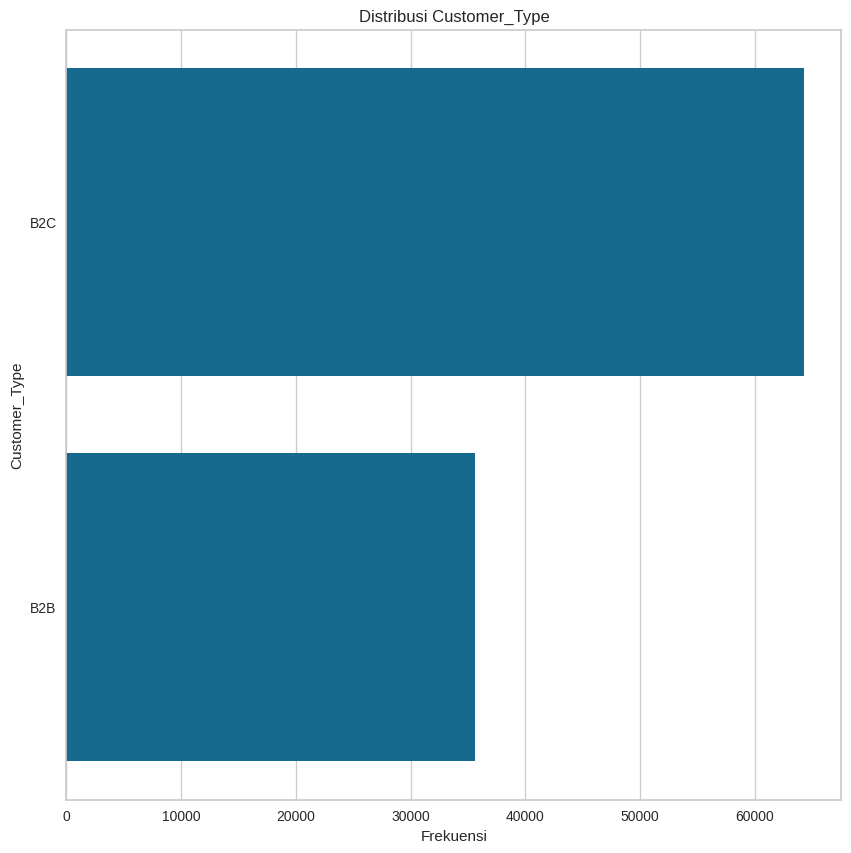

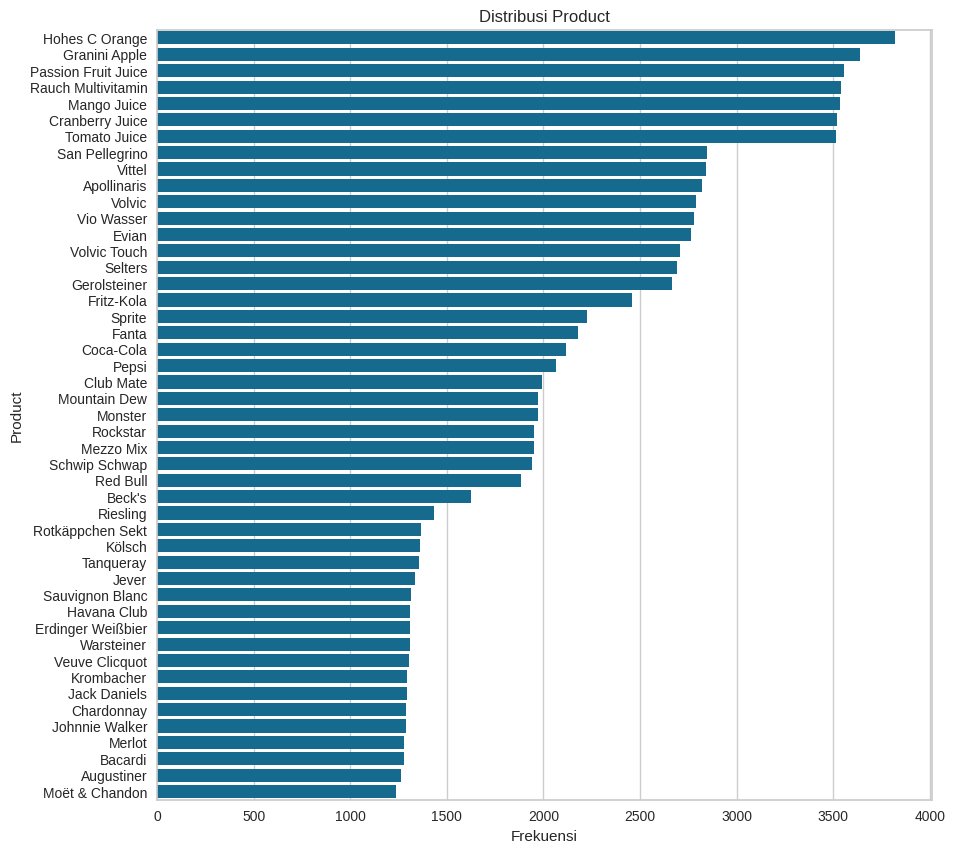

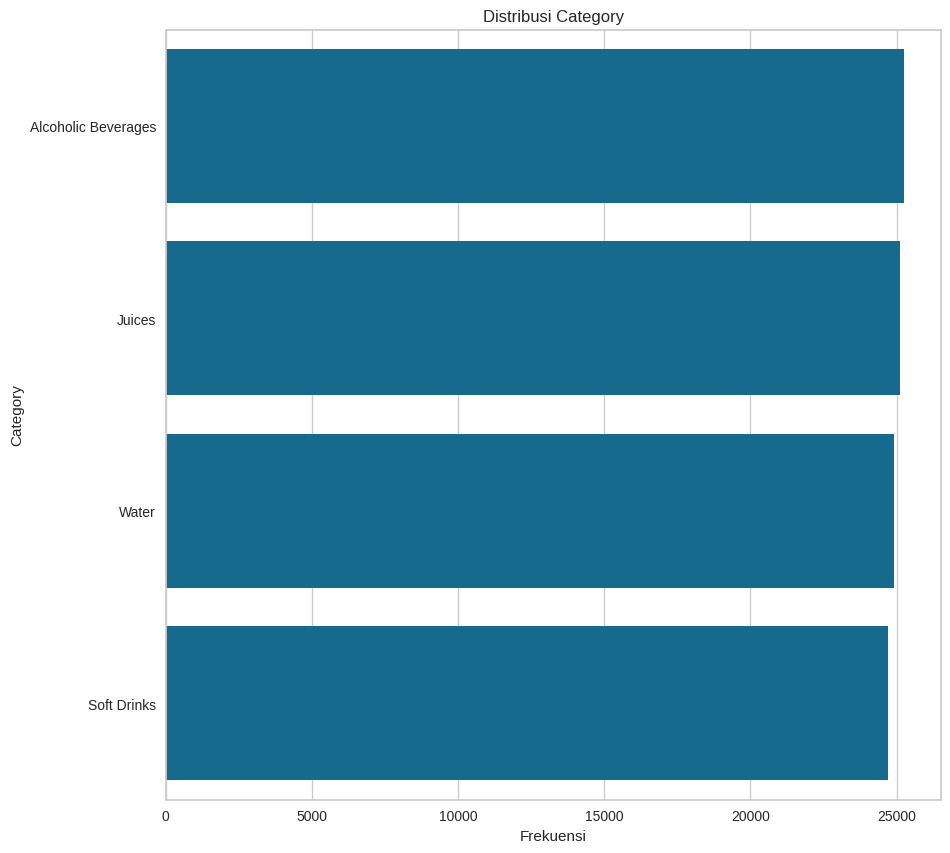

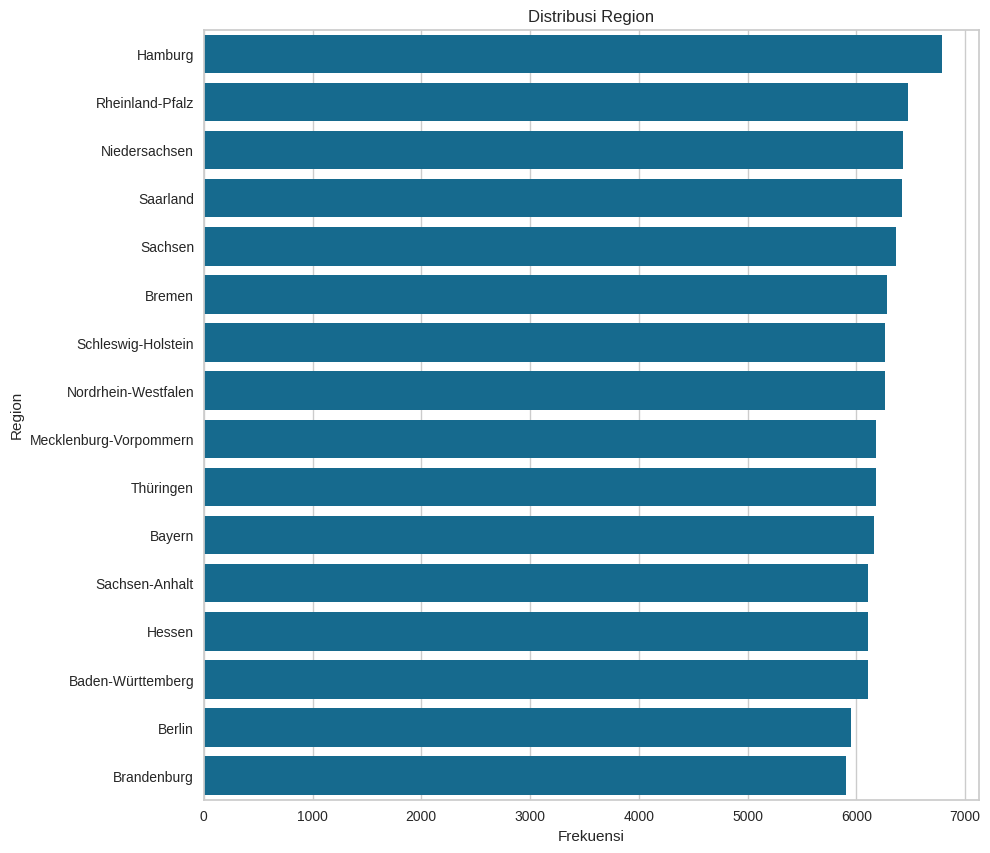

In [166]:
# Visualisasi Data Kategorikal
categorical_cols = ['Customer_Type', 'Product', 'Category', 'Region']
for col in categorical_cols:
    plt.figure(figsize=(10, 10))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.xlabel("Frekuensi")  # Mengubah label sumbu x menjadi Frekuensi
    plt.ylabel(col)  # Menyesuaikan label sumbu y dengan nama kolom
    plt.title(f"Distribusi {col}")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [167]:
# Cek jumlah duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah duplikat sebelum penghapusan: {duplicate_count}")

# Hapus data duplikat
df = df.drop_duplicates()

# Cek jumlah duplikat setelah penghapusan
duplicate_count_after = df.duplicated().sum()
print(f"Jumlah duplikat setelah penghapusan: {duplicate_count_after}")

# Jumlah baris dan kolom sekarang
print("Jumlah baris dan kolom sekarang:", df.shape)

Jumlah duplikat sebelum penghapusan: 35964
Jumlah duplikat setelah penghapusan: 0
Jumlah baris dan kolom sekarang: (64036, 8)


In [168]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
4990465,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen
5995542,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen
1044351,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen
1802181,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg
6900691,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen


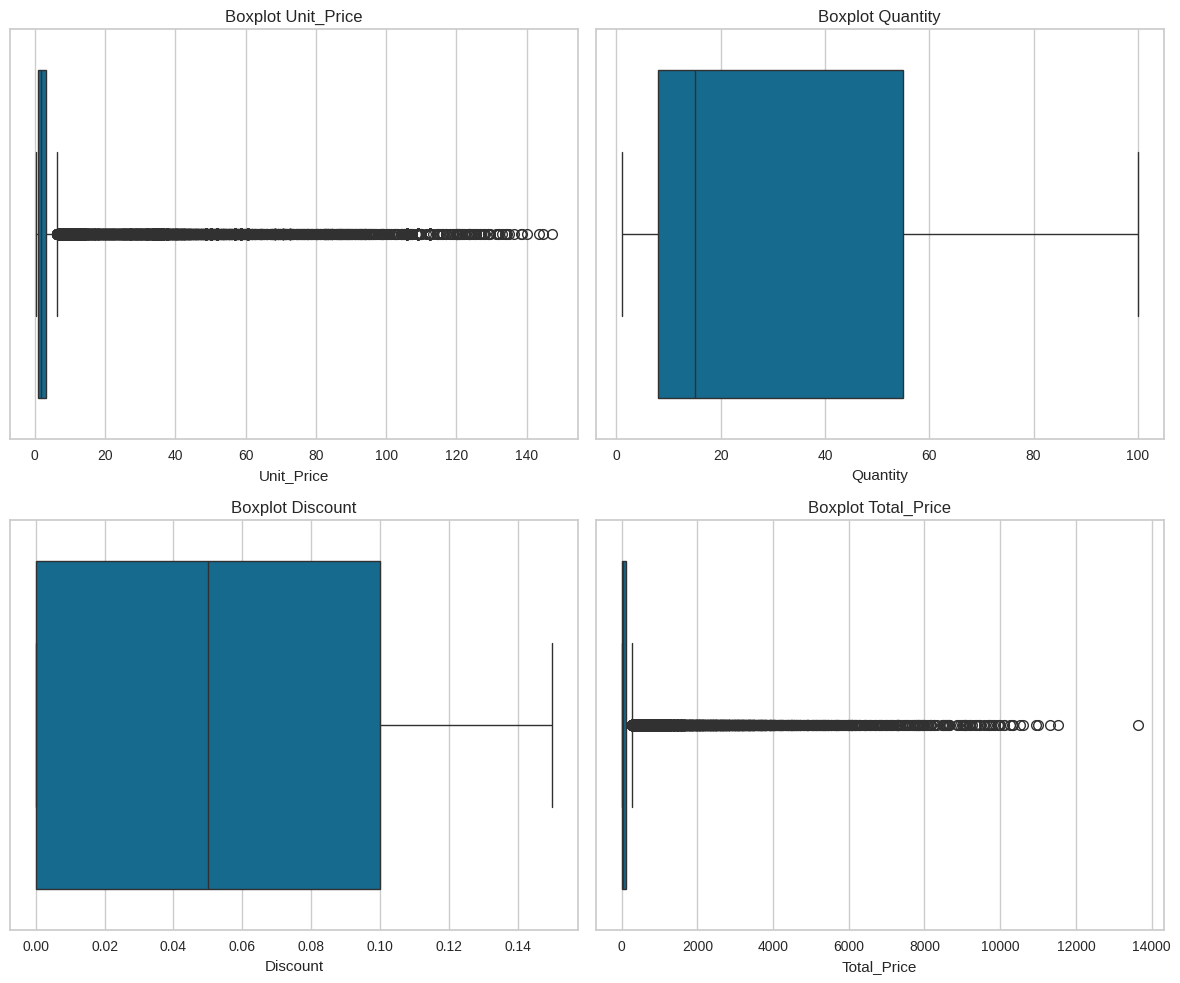

In [169]:
# Deteksi outlier
numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

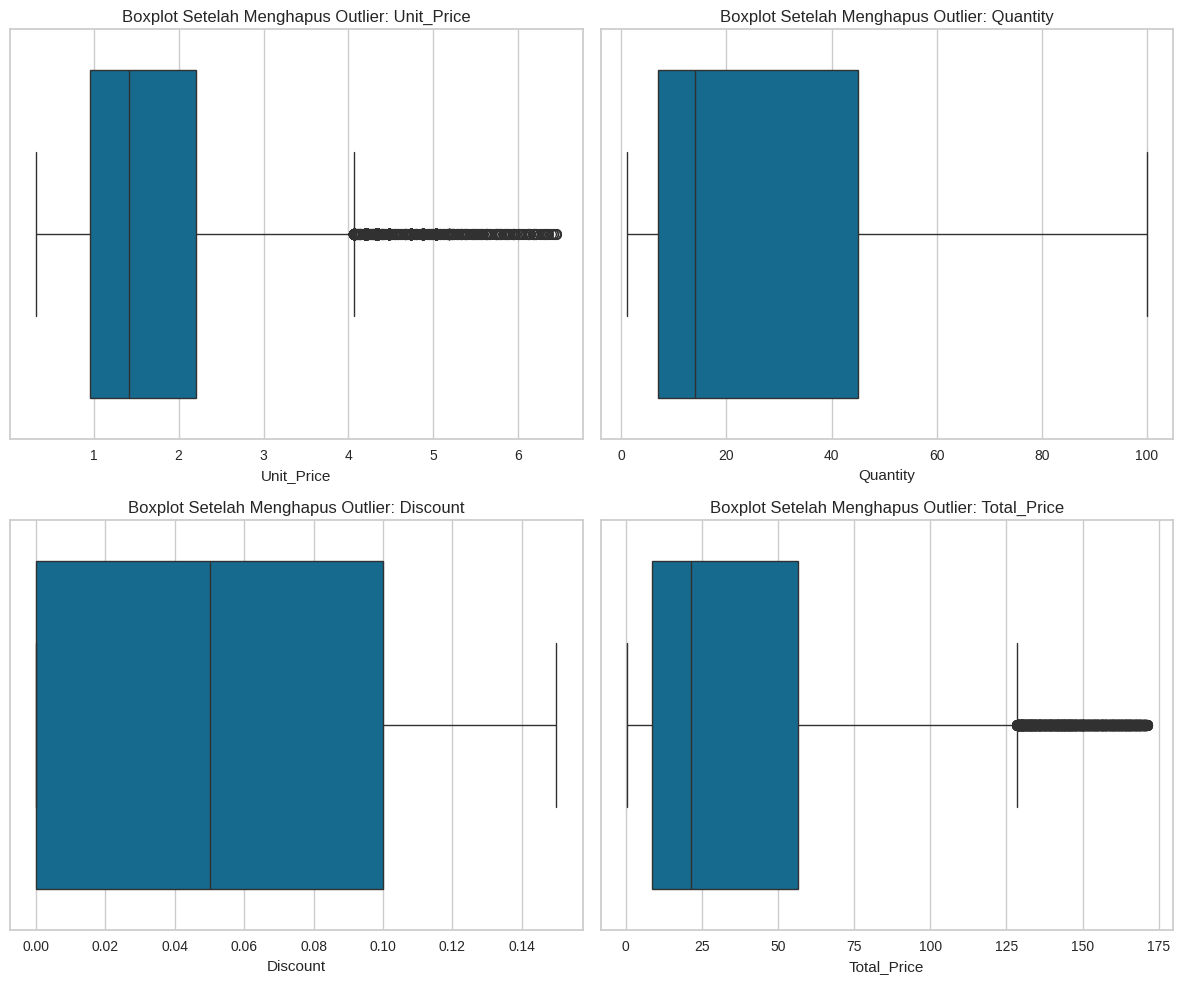

In [170]:
# Menangani outlier dengan metode IQR
def remove_outliers(df, numerical_cols):
    df_cleaned = df.copy()
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hapus data yang berada di luar batas IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Terapkan ke dataframe
df_cleaned = remove_outliers(df, numerical_cols)

# Cek apakah masih ada outlier
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot Setelah Menghapus Outlier: {col}")

plt.tight_layout()
plt.show()

In [171]:
df_cleaned.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
4990465,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen
5995542,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen
6900691,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen
7916353,B2C,Pepsi,Soft Drinks,1.74,5,0.00,8.70,Niedersachsen
2410826,B2C,Hohes C Orange,Juices,1.80,15,0.00,27.00,Saarland


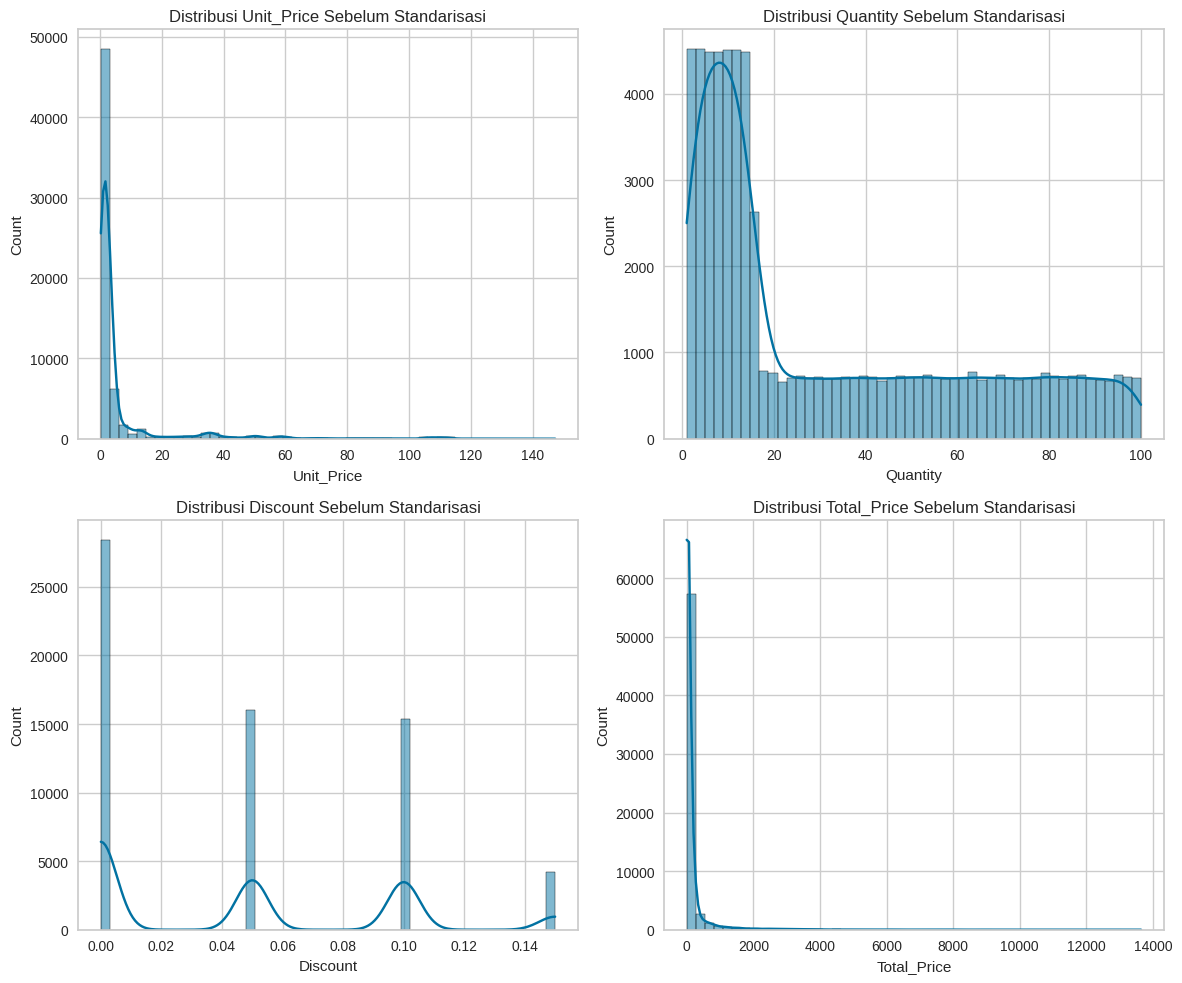

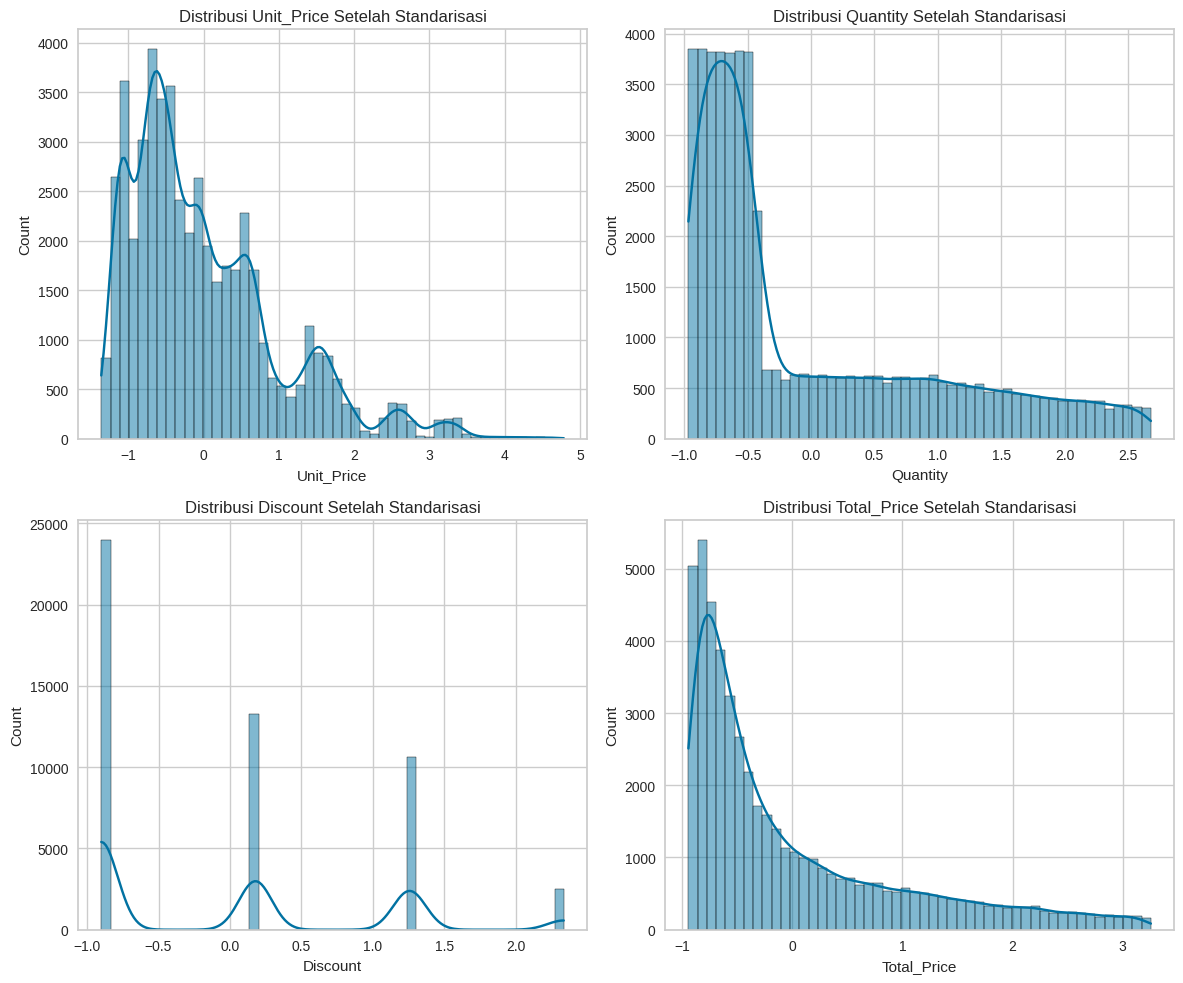

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
4990465,B2B,Hohes C Orange,Juices,0.195307,1.720634,1.256621,2.110045,Niedersachsen
5995542,B2B,Fritz-Kola,Soft Drinks,0.195307,-0.340422,0.178145,-0.165566,Bremen
6900691,B2C,Granini Apple,Juices,-0.035154,-0.855686,-0.900331,-0.790523,Sachsen
7916353,B2C,Pepsi,Soft Drinks,0.065046,-0.818882,-0.900331,-0.737910,Niedersachsen
2410826,B2C,Hohes C Orange,Juices,0.125167,-0.450836,-0.900331,-0.288000,Saarland


In [172]:
# Standarisasi fitur numerik
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Visualisasi distribusi sebelum standarisasi
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribusi {col} Sebelum Standarisasi")

plt.tight_layout()
plt.show()

# Visualisasi distribusi setelah standarisasi
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_scaled[col], bins=50, kde=True)
    plt.title(f"Distribusi {col} Setelah Standarisasi")

plt.tight_layout()
plt.show()

df_scaled.head()

In [173]:
# Statistik deskriptif sebelum dan sesudah standarisasi
print("Sebelum Standardisasi:\n", df[numerical_cols].describe())
print("\nSetelah Standardisasi:\n", df_scaled[numerical_cols].describe())

Sebelum Standardisasi:
          Unit_Price      Quantity      Discount   Total_Price
count  64036.000000  64036.000000  64036.000000  64036.000000
mean       6.445966     31.586982      0.046395    184.668936
std       15.589988     30.266583      0.048535    630.817034
min        0.320000      1.000000      0.000000      0.310000
25%        1.050000      8.000000      0.000000     11.480000
50%        1.780000     15.000000      0.050000     34.300000
75%        3.210000     55.000000      0.100000    111.290000
max      147.230000    100.000000      0.150000  13637.250000

Setelah Standardisasi:
          Unit_Price      Quantity      Discount   Total_Price
count  5.041100e+04  5.041100e+04  5.041100e+04  5.041100e+04
mean  -1.048668e-16 -4.172118e-17 -9.697356e-17  1.048668e-16
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00
min   -1.357799e+00 -9.661000e-01 -9.003311e-01 -9.441804e-01
25%   -7.165168e-01 -7.452725e-01 -9.003311e-01 -7.374185e-01
50%   -2.555950e-01 -

In [174]:
# Encoding data kategorikal

# Menentukan fitur kategorikal
categorical_features = ["Customer_Type", "Product", "Category", "Region"]

df_encoded = df_scaled.copy()

# Label Encoding untuk fitur ordinal
label_encoder = LabelEncoder()
df_encoded["Customer_Type"] = label_encoder.fit_transform(df_cleaned["Customer_Type"])

# One-Hot Encoding untuk fitur nominal
df_encoded = pd.get_dummies(df_encoded, columns=["Product", "Category", "Region"], drop_first=True)

# Salin hasil encoding ke variabel baru
df_final = df_encoded.copy()

# Menampilkan hasil
df_final.head()

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price,Product_Augustiner,Product_Beck's,Product_Chardonnay,Product_Club Mate,Product_Coca-Cola,...,Region_Hessen,Region_Mecklenburg-Vorpommern,Region_Niedersachsen,Region_Nordrhein-Westfalen,Region_Rheinland-Pfalz,Region_Saarland,Region_Sachsen,Region_Sachsen-Anhalt,Region_Schleswig-Holstein,Region_Thüringen
4990465,0,0.195307,1.720634,1.256621,2.110045,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5995542,0,0.195307,-0.340422,0.178145,-0.165566,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6900691,1,-0.035154,-0.855686,-0.900331,-0.790523,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7916353,1,0.065046,-0.818882,-0.900331,-0.737910,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2410826,1,0.125167,-0.450836,-0.900331,-0.288000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [175]:
kmeans_df = KMeans(n_clusters=5, random_state=0)
kmeans_df.fit(df_final)
kmeans_df

KMeans(n_clusters=5, random_state=0)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

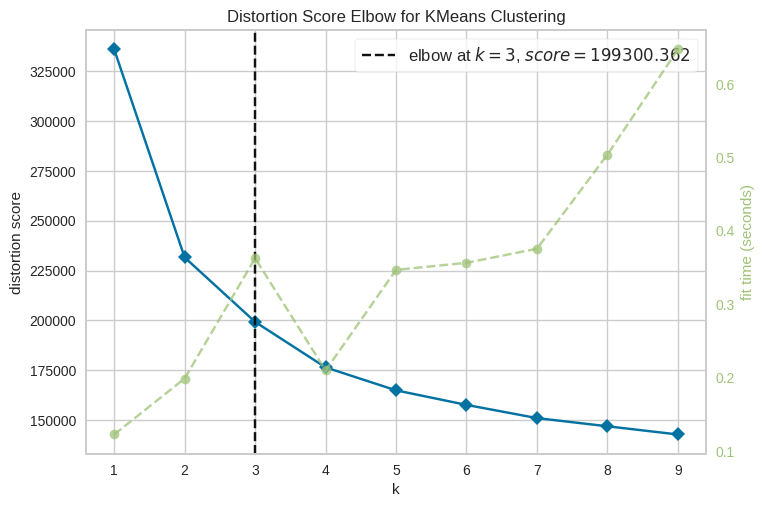

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [176]:
# Menggunakan Elbow Method untuk menentukan jumlah cluster optimal

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_final)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [177]:
# Menghtiung silhouette score

# Inisialisasi model KMeans dengan jumlah cluster 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Latih model KMeans
cluster_labels = kmeans.fit_predict(df_final)

# Hitung silhouette score
silhouette_avg = silhouette_score(df_final, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2333180393022144


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

5 fitur yang paling penting: ['Unit_Price', 'Total_Price', 'Discount', 'Quantity', 'Customer_Type']


<ipython-input-178-be8e852c711e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.head(5)['Importance'],


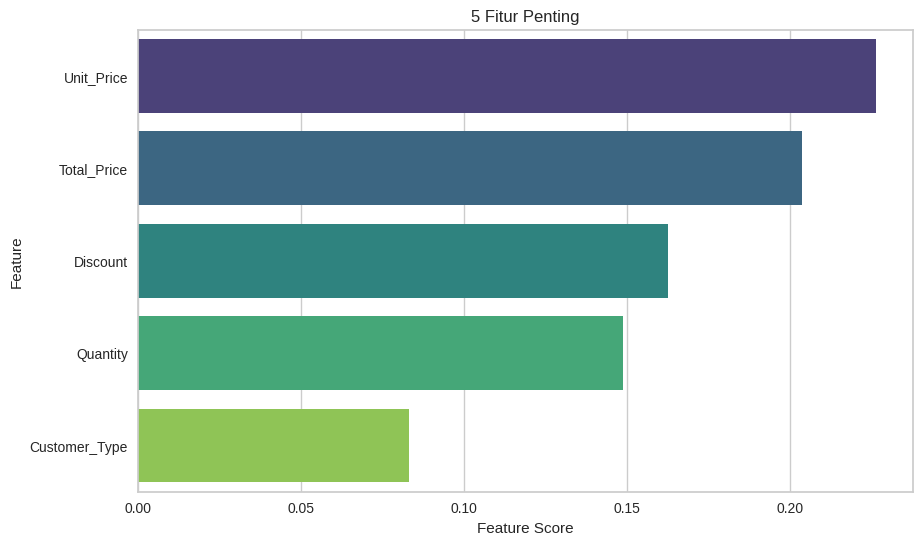

In [178]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Gunakan label cluster dari KMeans sebagai target
cluster_labels = kmeans_df.predict(df_final)
rf.fit(df_final, cluster_labels)  # Training dengan seluruh data yang sudah di-encoding

# Hitung fitur penting
feature_importances = pd.DataFrame({
    'Feature': df_final.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Pilih 5 fitur paling penting
selected_features = feature_importances.head(5)['Feature'].tolist()
print("5 fitur yang paling penting:", selected_features)

# Visualisasi 5 fitur paling penting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(5)['Importance'],
            y=feature_importances.head(5)['Feature'],
            palette="viridis")

plt.xlabel("Feature Score")
plt.ylabel("Feature")
plt.title("5 Fitur Penting")
plt.show()

# Ambil fitur terpenting
df_selected = df_final[selected_features]

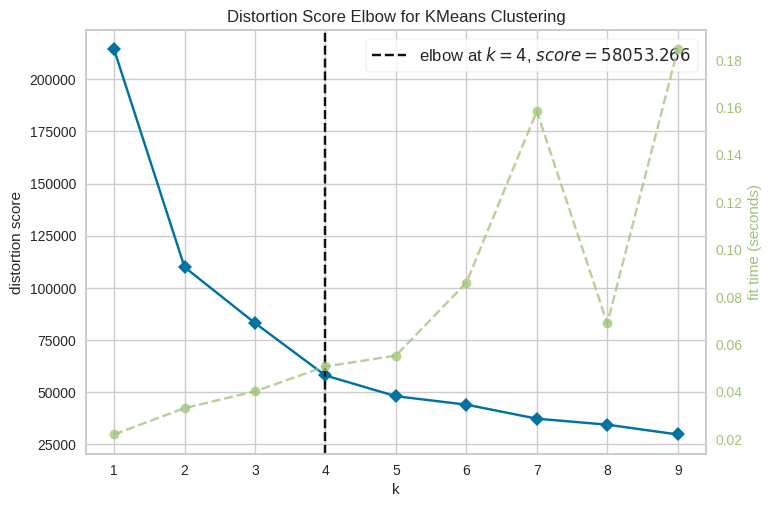

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [179]:
# Menggunakan Elbow Method untuk menentukan jumlah cluster optimal

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Gunakan dataset hasil Feature Selection langsung
visualizer.fit(df_selected)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [180]:
# Menghitung silhouette score

# Inisialisasi model KMeans dengan jumlah cluster 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Latih model KMeans
cluster_labels_after = kmeans.fit_predict(df_selected)

# Hitung silhouette score
silhouette_avg = silhouette_score(df_selected, cluster_labels_after)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4461606370282472


In [181]:
# --- Evaluasi Sebelum Feature Selection ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_final)
silhouette_before = silhouette_score(df_final, cluster_labels)

print(f"Silhouette Score Sebelum Feature Selection: {silhouette_before}")

# --- Evaluasi Setelah Feature Selection ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_after = kmeans.fit_predict(df_selected)
silhouette_after = silhouette_score(df_selected, cluster_labels_after)

print(f"Silhouette Score Setelah Feature Selection: {silhouette_after}")

# Peningkatan score
improvement = ((silhouette_after - silhouette_before) / silhouette_before) * 100
print(f"Peningkatan Silhouette Score: {improvement:.2f}%")

Silhouette Score Sebelum Feature Selection: 0.2333180393022144
Silhouette Score Setelah Feature Selection: 0.4461606370282472
Peningkatan Silhouette Score: 91.22%


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


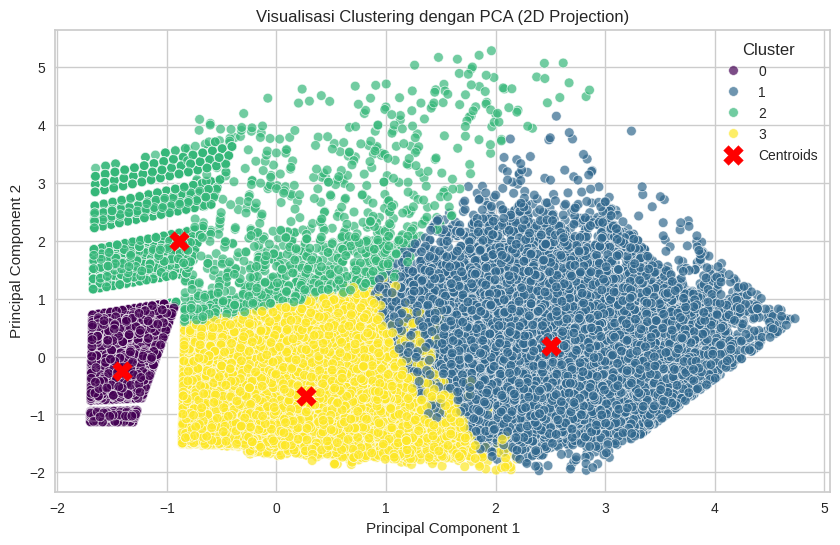

In [182]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)  # Gunakan data setelah Feature Selection

# Konversi ke DataFrame untuk mempermudah plotting
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

df_pca["Cluster"] = cluster_labels_after

# Buat scatter plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", palette="viridis", data=df_pca, alpha=0.7)

# Tambahkan centroid cluster
centers_pca = pca.transform(kmeans.cluster_centers_)  # Proyeksi centroid ke PCA
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label="Centroids")

# Tambahkan judul dan label
plt.title("Visualisasi Clustering dengan PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [183]:
df_labeled = df_selected.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Unit_Price,Total_Price,Discount,Quantity,Customer_Type,Cluster
4990465,0.195307,2.110045,1.256621,1.720634,0,1
5995542,0.195307,-0.165566,0.178145,-0.340422,0,3
6900691,-0.035154,-0.790523,-0.900331,-0.855686,1,0
7916353,0.065046,-0.737910,-0.900331,-0.818882,1,0
2410826,0.125167,-0.288000,-0.900331,-0.450836,1,0


In [184]:
# Inverse transform featur kategorikal
df_labeled['Customer_Type'] = label_encoder.inverse_transform(df_labeled[['Customer_Type']])
df_labeled.head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Unit_Price,Total_Price,Discount,Quantity,Customer_Type,Cluster
4990465,0.195307,2.110045,1.256621,1.720634,B2B,1
5995542,0.195307,-0.165566,0.178145,-0.340422,B2B,3
6900691,-0.035154,-0.790523,-0.900331,-0.855686,B2C,0
7916353,0.065046,-0.737910,-0.900331,-0.818882,B2C,0
2410826,0.125167,-0.288000,-0.900331,-0.450836,B2C,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [185]:
# Inverse transform feature numerik
df_labeled[numerical_cols] = scaler.inverse_transform(df_labeled[numerical_cols])
df_labeled.head()

,Unit_Price,Total_Price,Discount,Quantity,Customer_Type,Cluster
4990465,1.87,124.54,0.10,74.0,B2B,1
5995542,1.87,31.98,0.05,18.0,B2B,3
6900691,1.64,6.56,0.00,4.0,B2C,0
7916353,1.74,8.70,0.00,5.0,B2C,0
2410826,1.80,27.00,0.00,15.0,B2C,0


In [186]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50411 entries, 4990465 to 1950082
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     50411 non-null  float64
 1   Total_Price    50411 non-null  float64
 2   Discount       50411 non-null  float64
 3   Quantity       50411 non-null  float64
 4   Customer_Type  50411 non-null  object 
 5   Cluster        50411 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 2.5+ MB


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

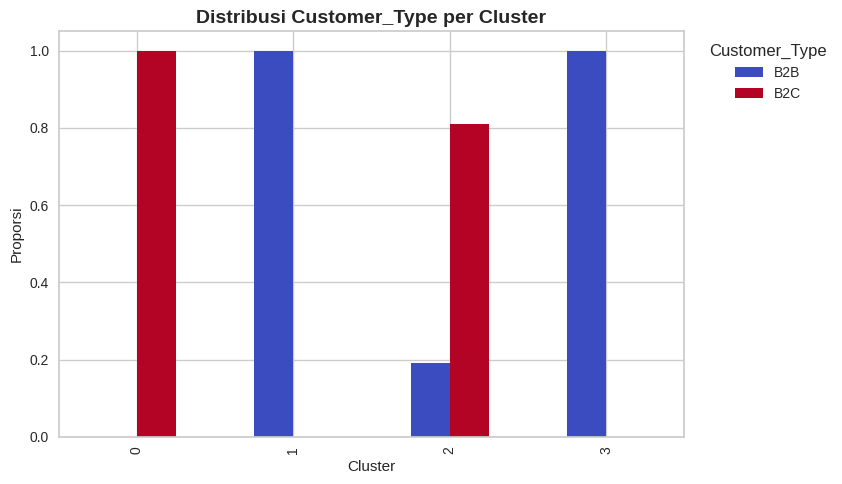

In [187]:
# Distribusi kolom kategorikal per cluster
# Memilih hanya kolom kategorikal
categorical_columns = df_labeled.select_dtypes(include=['object']).columns

# Menentukan jumlah baris dan kolom untuk grid
n_cols = 2  # Jumlah kolom
n_rows = math.ceil(len(categorical_columns) / n_cols)  # Jumlah baris

# Membuat figure dengan ukuran yang cukup besar
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Ubah array subplot jadi 1D

for i, col in enumerate(categorical_columns):
    # Menghitung distribusi kategori dalam setiap cluster
    category_distribution = df_labeled.groupby('Cluster')[col].value_counts(normalize=True).unstack()

    # Plot stacked bar chart
    category_distribution.plot(kind='bar', stacked=False, ax=axes[i], colormap='coolwarm')

    # Set judul dan label
    axes[i].set_title(f'Distribusi {col} per Cluster', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Proporsi')
    axes[i].legend(title=col, bbox_to_anchor=(1.02, 1), loc='upper left')

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Cluster
0    19061
1    11404
2     6093
3    13853
Name: count, dtype: int64


<ipython-input-188-6f7720b7e44a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


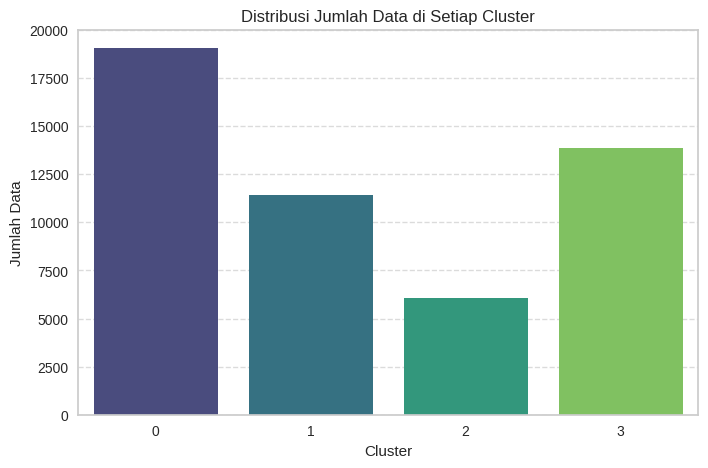

In [188]:
# Hitung jumlah data di setiap cluster
cluster_counts = df_labeled['Cluster'].value_counts().sort_index()

# Tampilkan hasil jumlah tiap cluster
print(cluster_counts)

# Visualisasi jumlah data tiap cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Tambahkan label pada grafik
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data di Setiap Cluster")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

In [189]:
# Analisis karakteristik setiap cluster
def analyze_clusters(df, cluster_col, numerical_cols, categorical_cols):
    print("Analisis Karakteristik Setiap Cluster:")

    clusters = df[cluster_col].unique()
    cluster_summary = []

    for cluster_id in clusters:
        cluster_data = df[df[cluster_col] == cluster_id]
        summary = {"Cluster": cluster_id}

        print(f"\nCluster {cluster_id}:")

        # Analisis fitur numerik (min, max, mean)
        for col in numerical_cols:
            min_value = cluster_data[col].min()
            max_value = cluster_data[col].max()
            mean_value = cluster_data[col].mean()
            summary[f"{col}_mean"] = mean_value
            summary[f"{col}_min"] = min_value
            summary[f"{col}_max"] = max_value
            print(f"{col}: Rata-rata = {mean_value:.2f}, Min = {min_value:.2f}, Max = {max_value:.2f}")

        # Analisis fitur kategorikal (modus)
        for col in categorical_cols:
            mode_value = cluster_data[col].mode()[0] if not cluster_data[col].mode().empty else "Tidak ada data"
            summary[f"{col}_mode"] = mode_value
            print(f"{col}: Modus = {mode_value}")

        cluster_summary.append(summary)

    return pd.DataFrame(cluster_summary)

# Definisikan kolom numerik dan kategorikal
numerical_cols = ['Unit_Price', 'Total_Price', 'Quantity', 'Discount']
categorical_cols = ['Customer_Type']

# Jalankan analisis dan simpan hasil
cluster_summary_df = analyze_clusters(df_labeled, 'Cluster', numerical_cols, categorical_cols)

# Tampilkan hasil agregasi dalam bentuk tabel
print("\nRingkasan Karakteristik Cluster:")
cluster_summary_df

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Unit_Price: Rata-rata = 1.76, Min = 0.36, Max = 5.41
Total_Price: Rata-rata = 101.70, Min = 25.09, Max = 171.17
Quantity: Rata-rata = 68.82, Min = 19.00, Max = 100.00
Discount: Rata-rata = 0.10, Min = 0.05, Max = 0.15
Customer_Type: Modus = B2B

Cluster 3:
Unit_Price: Rata-rata = 1.18, Min = 0.32, Max = 3.58
Total_Price: Rata-rata = 27.20, Min = 0.31, Max = 79.04
Quantity: Rata-rata = 27.31, Min = 1.00, Max = 83.00
Discount: Rata-rata = 0.07, Min = 0.05, Max = 0.15
Customer_Type: Modus = B2B

Cluster 0:
Unit_Price: Rata-rata = 1.35, Min = 0.46, Max = 2.45
Total_Price: Rata-rata = 10.74, Min = 0.46, Max = 35.70
Quantity: Rata-rata = 7.99, Min = 1.00, Max = 15.00
Discount: Rata-rata = 0.00, Min = 0.00, Max = 0.00
Customer_Type: Modus = B2C

Cluster 2:
Unit_Price: Rata-rata = 3.66, Min = 2.45, Max = 6.45
Total_Price: Rata-rata = 34.51, Min = 2.43, Max = 171.15
Quantity: Rata-rata = 9.55, Min = 1.00, Max = 36.00
Discount: Rata-rata = 0.01,

,Cluster,Unit_Price_mean,Unit_Price_min,Unit_Price_max,Total_Price_mean,Total_Price_min,Total_Price_max,Quantity_mean,Quantity_min,Quantity_max,Discount_mean,Discount_min,Discount_max,Customer_Type_mode
0,1,1.760633,0.36,5.41,101.699634,25.09,171.17,68.820239,19.0,100.0,0.096725,0.05,0.15,B2B
1,3,1.183282,0.32,3.58,27.198756,0.31,79.04,27.311196,1.0,83.0,0.067502,0.05,0.15,B2B
2,0,1.346266,0.46,2.45,10.742550,0.46,35.70,7.991763,1.0,15.0,0.000000,0.00,0.00,B2C
3,2,3.661776,2.45,6.45,34.514700,2.43,171.15,9.547514,1.0,36.0,0.010840,0.00,0.15,B2C


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Unit_Price**: Rata-rata = 1.35, Min = 0.46, Max = 2.45
- **Total_Price**: Rata-rata = 10.74, Min = 0.46, Max = 35.70
- **Quantity**: Rata-rata = 7.99, Min = 1.00, Max = 15.00
- **Discount**: Rata-rata = 0.00, Min = 0.00, Max = 0.00
- **Customer_Type**: Modus = B2C (Business to Consumer)
- **Analisis**: Cluster ini berisi pelanggan B2C (Business to Consumer) yang membeli dalam jumlah kecil (rata-rata sekitar 8 produk per transaksi) dengan harga produk yang relatif rendah. Tidak ada diskon yang diberikan pada cluster ini, kemungkinan karena pelanggan individu berbelanja dalam jumlah kecil. Ini menunjukkan perilaku belanja ritel biasa.

## Cluster 1:
- **Unit_Price**: Rata-rata = 1.76, Min = 0.36, Max = 5.41
- **Total_Price**: Rata-rata = 101.70, Min = 25.09, Max = 171.17
- **Quantity**: Rata-rata = 68.82, Min = 19.00, Max = 100.00
- **Discount**: Rata-rata = 0.10, Min = 0.05, Max = 0.15
- **Customer_Type**: Modus = B2B (Business to Business)
- **Analisis**: Cluster ini didominasi oleh pelanggan B2B (Business to Business) yang membeli dalam jumlah besar (rata-rata hampir 69 unit per transaksi). Total transaksi mereka cukup tinggi, dan mereka mendapatkan diskon yang signifikan, dengan rata-rata sekitar 10%. Ini menunjukkan bahwa pelanggan bisnis mendapatkan diskon untuk pembelian dalam jumlah banyak. Pelanggan bisnis membeli dalam jumlah lebih banyak yang kemungkinan untuk kebutuhan operasional atau stok.

## Cluster 2:
- **Unit_Price**: Rata-rata = 3.66, Min = 2.45, Max = 6.45
- **Total_Price**: Rata-rata = 34.51, Min = 2.43, Max = 171.15
- **Quantity**: Rata-rata = 9.55, Min = 1.00, Max = 36.00
- **Discount**: Rata-rata = 0.01, Min = 0.00, Max = 0.15
- **Customer_Type**: Modus = B2C (Business to Consumer)
- **Analisis**: Cluster ini berisi pelanggan B2C (Business to Consumer) yang membeli produk dengan harga produk lebih tinggi dibandingkan Cluster 0. Namun, mereka membeli dalam jumlah sedang (sekitar 9 produk per transaksi). Diskon yang diberikan sangat kecil, menunjukkan bahwa pelanggan ini masih merupakan pelanggan ritel tetapi membeli barang dengan harga yang lebih mahal.

## Cluster 3
- **Unit_Price**: Rata-rata = 1.18, Min = 0.32, Max = 3.58
- **Total_Price**: Rata-rata = 27.20, Min = 0.31, Max = 79.04
- **Quantity**: Rata-rata = 27.31, Min = 1.00, Max = 83.00
- **Discount**: Rata-rata = 0.07, Min = 0.05, Max = 0.15
- **Customer_Type**: Modus = B2B (Business to Business)
- **Analisis**: Cluster ini berisi pelanggan B2B (Business to Business) yang membeli dalam jumlah sedang (rata-rata 27 produk per transaksi) dengan rata-rata harga produk yang lebih rendah dibandingkan Cluster 1. Mereka mendapatkan diskon sekitar 7%, menunjukkan bahwa mereka masih termasuk pelanggan bisnis tetapi dengan jumlah pembelian yang lebih kecil dibandingkan pelanggan bisnis di Cluster 1.

## Kesimpulan & Insight
Hasil clustering sesuai dengan ekspektasi bisnis, karena berhasil mengelompokkan pelanggan berdasarkan pola pembelian dan jenis pelanggan (B2B/B2C).  
Hasil clustering menunjukkan bahwa ada perbedaan pola belanja antara pelanggan B2B dan B2C, serta perbedaan dalam harga unit, jumlah barang, dan diskon yang diterima.  
Pola yang bisa dimanfaatkan:
- Cluster 1 dan Cluster 3 berisi pelanggan B2B, tetapi Cluster 1 memiliki jumlah pembelian yang jauh lebih besar dan mendapatkan diskon lebih tinggi. Ini menunjukkan adanya potensi untuk menawarkan program diskon tambahan bagi pelanggan di Cluster 3 agar mereka meningkatkan pembelian mereka.
- Cluster 0 dan Cluster 2 berisi pelanggan B2C, tetapi Cluster 2 membeli barang dengan harga produk lebih tinggi. Strategi promosi yang lebih maksimal dapat diterapkan pada Cluster 2 untuk meningkatkan jumlah barang yang mereka beli.
- Diskon hanya signifikan pada pelanggan B2B, menunjukkan bahwa diskon lebih ditujukan untuk pembelian dalam jumalh besar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [190]:
df_labeled.to_csv("Dataset_clustering.csv", index=False)